(EigValEigVec)=

# 2.2 Eigenvalores y eigenvectores

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:2.1.4`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de [liga](https://www.dropbox.com/s/s4ch0ww1687pl76/3.2.2.Factorizaciones_matriciales_SVD_Cholesky_QR.pdf?dl=0).

## Definiciones y resultados generales

### En lo que sigue se asume que $A \in \mathbb{R}^{n \times n}$.

## Eigenvalor (valor propio o característico)

El número $\lambda$ (real o complejo) se denomina *eigenvalor* de A si existe $v \in \mathbb{C}^n - \{0\}$ tal que $Av = \lambda v$. El vector $v$ se nombra eigenvector (vector propio o característico) de $A$ correspondiente al eigenvalor $\lambda$.

```{admonition} Observación
:class: tip 

Observa que si $Av=\lambda v$ y $v \in \mathbb{C}^n-\{0\}$ entonces la matriz $A-\lambda I_n$ es singular por lo que su determinante es cero.

```

```{admonition} Comentarios

* Una matriz con componentes reales puede tener eigenvalores y eigenvectores con valores en $\mathbb{C}$ o $\mathbb{C}^n$ respectivamente.
* El conjunto de eigenvalores se le nombra **espectro de una matriz** y se denota como:

$$\lambda(A) = \{ \lambda | \det(A-\lambda I_n) = 0\}.$$

* El polinomio 

$$p(z) = \det(A-zI_n) = (-1)^nz^n + a_{n-1}z^{n-1}+ \dots + a_1z + a_0$$

se le nombra **polinomio característico asociado a $A$** y sus raíces o ceros son los eigenvalores de $A$.

* La multiplicación de $A$ por un eigenvector es un reescalamiento y posible cambio de dirección del eigenvector.
* Si consideramos que nuestros espacios vectoriales se definen sobre $\mathbb{C}$ entonces siempre podemos asegurar que $A$ tiene un eigenvalor con eigenvector asociado. En este caso $A$ tiene $n$ eigenvalores y pueden o no repetirse.

* Se puede probar que el determinante de $A$: $\det(A) = \displaystyle \prod_{i=1}^n \lambda_i$ y la traza de $A$: $tr(A) = \displaystyle \sum_{i=1}^n \lambda_i$.
```

### Ejemplo

In [1]:
import numpy as np

In [2]:
A=np.array([[10,-18],[6,-11]])

In [3]:
A

array([[ 10, -18],
       [  6, -11]])

**En *NumPy* con el módulo [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) podemos obtener eigenvalores y eigenvectores** 

In [4]:
evalue, evector = np.linalg.eig(A)

In [5]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[ 1. -2.]
eigenvectores:
[[0.89442719 0.83205029]
 [0.4472136  0.5547002 ]]


```{margin}

$Av_1 = \lambda_1 v_1$.
```

In [6]:
print('matriz * eigenvector:')
print(A@evector[:,0])
print('eigenvalor * eigenvector:')
print(evalue[0]*evector[:,0])

matriz * eigenvector:
[0.89442719 0.4472136 ]
eigenvalor * eigenvector:
[0.89442719 0.4472136 ]


```{margin}

$Av_2 = \lambda_2 v_2$.
```

In [7]:
print('matriz * eigenvector:')
print(A@evector[:,1])
print('eigenvalor * eigenvector:')
print(evalue[1]*evector[:,1])

matriz * eigenvector:
[-1.66410059 -1.10940039]
eigenvalor * eigenvector:
[-1.66410059 -1.10940039]


### Ejemplo 

Si $v$ es un eigenvector entonces $cv$ es eigenvector donde: $c$ es una constante distinta de cero.


In [8]:
const = -2
const_evector = const*evector[:,0]
print(const_evector)

[-1.78885438 -0.89442719]


```{margin}

$cv$ es un eigenvector con eigenvalor asociado $c\lambda$ pues $A(cv) = \lambda(cv)$ se satisface si $Av = \lambda v$ y $c \neq 0$.

```

In [9]:
print('matriz * (constante * eigenvector):')
print(A@const_evector)
print('eigenvalor * (constante * eigenvector):')
print(evalue[0]*const_evector)

matriz * (constante * eigenvector):
[-1.78885438 -0.89442719]
eigenvalor * (constante * eigenvector):
[-1.78885438 -0.89442719]


### Ejemplo 

Una matriz con entradas reales puede tener eigenvalores y eigenvectores complejos:

In [10]:
A=np.array([[3,-5],[1,-1]])

In [11]:
print(A)

[[ 3 -5]
 [ 1 -1]]


In [12]:
evalue, evector = np.linalg.eig(A)

```{margin}

Para $A \in \mathbb{R}^{n \times n}$ se tiene: $\lambda \in \mathbb{C}$ si y sólo si $\bar{\lambda} \in \mathbb{C}$ con $\bar{\lambda}$ el conjugado de $\lambda$.

```

In [13]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[1.+1.j 1.-1.j]
eigenvectores:
[[0.91287093+0.j         0.91287093-0.j        ]
 [0.36514837-0.18257419j 0.36514837+0.18257419j]]


### Ejemplo

Los eigenvalores de una matriz diagonal son iguales a su diagonal y sus eigenvectores son los vectores canónicos $e_1, e_2, \dots e_n$.

In [14]:
A = np.diag([2, 2, 2, 2])

In [15]:
print(A)

[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]]


In [16]:
evalue, evector = np.linalg.eig(A)

In [17]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[2. 2. 2. 2.]
eigenvectores:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


```{admonition} Definición

La **multiplicidad algebraica** de un eigenvalor es su multiplicidad considerado como raíz/cero del polinomio característico $p(z)$. Si no se repite entonces tal eigenvalor se le nombra de multiplicidad **simple**.

La **multiplicidad geométrica** de un eigenvalor es el número máximo de eigenvectores linealmente independientes asociados a éste.

```

```{admonition} Observación
:class: tip

En el ejemplo anterior cada eigenvalor tiene una multiplicidad simple y la multiplicidad geométrica de cada eigenvalor es $1$.

```

### Ejemplo

Los eigenvalores de una matriz triangular son iguales a su diagonal.

In [18]:
A=np.array([[10,0, -1],
            [6,10, 10],
            [3, 4, 11.0]])
A = np.triu(A)

In [19]:
A

array([[10.,  0., -1.],
       [ 0., 10., 10.],
       [ 0.,  0., 11.]])

In [20]:
evalue, evector = np.linalg.eig(A)

```{margin}

Observa que el eigenvalor igual a $10$ está repetido dos veces (multiplicidad algebraica igual a $2$) y se tienen dos eigenvectores linealmente independientes asociados a éste (multiplicidad geométrica igual a $2$). 
```

In [21]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[10. 10. 11.]
eigenvectores:
[[ 1.          0.         -0.09901475]
 [ 0.          1.          0.99014754]
 [ 0.          0.          0.09901475]]


**Otro ejemplo:**

In [22]:
A=np.array([[10,18, -1],
            [6,10, 10],
            [3, 4, 11.0]])
A = np.triu(A)

In [23]:
A

array([[10., 18., -1.],
       [ 0., 10., 10.],
       [ 0.,  0., 11.]])

In [24]:
evalue, evector = np.linalg.eig(A)

```{margin}

Observa que en este ejemplo el eigenvalor $10$ está repetido dos veces (multiplicidad algebraica es igual a $2$) y sus eigenvectores asociados son linealmente dependientes (multiplicidad geométrica es igual a $1$).
```

In [25]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[10. 10. 11.]
eigenvectores:
[[ 1.00000000e+00 -1.00000000e+00  9.98427611e-01]
 [ 0.00000000e+00  1.23358114e-16  5.57780788e-02]
 [ 0.00000000e+00  0.00000000e+00  5.57780788e-03]]


### Ejemplo

Un eigenvalor puede estar repetido y tener un sólo eigenvector linealmente independiente: 

In [26]:
A = np.array([[2, 1, 0],
              [0, 2, 1],
              [0, 0, 2]])

In [27]:
evalue, evector = np.linalg.eig(A)

```{margin}

Observa que en este ejemplo el eigenvalor $2$ está repetido tres veces (multiplicidad algebraica es igual a $3$) y sus eigenvectores asociados son linealmente dependientes (multiplicidad geométrica es igual a $1$).
```

In [28]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[2. 2. 2.]
eigenvectores:
[[ 1.00000000e+00 -1.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  4.44089210e-16 -4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00  1.97215226e-31]]


```{admonition} Definición

Si $(\lambda, v)$ es una pareja de eigenvalor-eigenvector de $A$ tales que $Av = \lambda v$ entonces $v$ se le nombra eigenvector derecho. Si $(\lambda, v)$ es una pareja de eigenvalor-eigenvector de $A^T$ tales que $A^Tv = \lambda v$ (que es equivalente a $v^TA=\lambda v^T$) entonces $v$ se le nombra eigenvector izquierdo.
```

```{admonition} Observaciones
:class: tip

* En todos los ejemplos anteriores se calcularon eigenvectores derechos.

* Los eigenvectores izquierdos y derechos para una matriz simétrica son iguales.

```

(Diagonalizable)=

## $A$ diagonalizable

```{admonition} Definición

Si $A$ tiene $n$ eigenvectores linealmente independientes entonces $A$ se nombra diagonalizable o *non defective*. En este caso si $x_1, x_2, \dots, x_n$ son eigenvectores de $A$ con $Ax_i = \lambda_i x_i$ para $i=1,\dots,n$ entonces la igualdad anterior se escribe en ecuación matricial como:

$$AX = X \Lambda$$

o bien:

$$A = X \Lambda X^{-1}$$

donde: $X$ tiene por columnas los eigenvectores de $A$ y $\Lambda$ tiene en su diagonal los eigenvalores de $A$.

A la descomposición anterior $A = X \Lambda X^{-1}$ para $A$ diagonalizable o *non defective* se le nombra ***eigen decomposition***.
```

```{admonition} Observación
:class: tip

* Si $A = X \Lambda X^{-1}$ entonces $X^{-1}A = \Lambda X^{-1}$ y los renglones de $X^{-1}$ (o equivalentemente las columnas de $X^{-T}$) son eigenvectores izquierdos.

* Si $A = X \Lambda X^{-1}$ y $b = Ax = (X \Lambda X^{-1}) x$ entonces:

$$\tilde{b} = X^{-1}b = X^{-1}  (Ax) = X^{-1} (X \Lambda X^{-1}) x = \Lambda X^{-1}x = \Lambda \tilde{x}.$$

Lo anterior indica que el producto matricial $Ax$ para $A$ diagonalizable es equivalente a multiplicar una matriz diagonal por un vector denotado como $\tilde{x}$ que contiene los coeficientes de la combinación lineal de las columnas de $X$ para el vector $x$ . El resultado de tal multiplicación es un vector denotado como $\tilde{b}$ que también contiene los coeficientes de la combinación lineal de las columnas de $X$ para el vector $b$. En resúmen, si $A$ es diagonalizable o *non defective* la multiplicación $Ax$ es equivalente a la multiplicación por una matriz diagonal $\Lambda \tilde{x}$ (salvo un cambio de bases, ver [Change of basis](https://en.wikipedia.org/wiki/Change_of_basis)).

* Si una matriz $A$ tiene eigenvalores distintos entonces es diagonalizable y más general: si $A$ tiene una multiplicidad geométrica igual a su multiplicidad algebraica de cada eigenvalor entonces es diagonalizable. 

```

### Ejemplo

La matriz:

$$A = \left[
\begin{array}{ccc}
1 & -4 & -4\\
8 & -11 & -8\\
-8 & 8 & 5
\end{array}
\right]
$$

es diagonalizable.

In [29]:
A = np.array([[1, -4, -4],
              [8, -11, -8],
              [-8, 8, 5.0]])

In [30]:
A

array([[  1.,  -4.,  -4.],
       [  8., -11.,  -8.],
       [ -8.,   8.,   5.]])

In [31]:
evalue, evector = np.linalg.eig(A)

In [32]:
print('eigenvalores:')
print(evalue)

eigenvalores:
[ 1. -3. -3.]


```{margin}

Se verifica que los eigenvectores de este ejemplo es un conjunto linealmente independiente por lo que $A=X\Lambda X^{-1}$.

```

In [33]:
with np.printoptions(precision=3, suppress=True):
    print('eigenvectores:')
    print(evector)

eigenvectores:
[[ 0.333 -0.717 -0.241]
 [ 0.667 -0.02  -0.796]
 [-0.667 -0.697  0.555]]


In [34]:
X = evector
Lambda = np.diag(evalue)

```{margin}

Observa que si $Z$ es desconocida y $X^T Z^T = \Lambda$ entonces $Z^T = X^{-T} \Lambda$ y por tanto $XZ =X\Lambda X^{-1}$.
```

In [35]:
X@np.linalg.solve(X.T, Lambda).T

array([[  1.,  -4.,  -4.],
       [  8., -11.,  -8.],
       [ -8.,   8.,   5.]])

In [36]:
A

array([[  1.,  -4.,  -4.],
       [  8., -11.,  -8.],
       [ -8.,   8.,   5.]])

$A$ es diagonalizable pues: $X^{-1} A X = \Lambda$

```{margin}

Observa que si $Z$ es desconocida y $XZ = A$ entonces $Z = X^{-1}A$ y por tanto $ZX = X^{-1} A X$.
```

In [37]:
with np.printoptions(precision = 3, suppress=True):
    print(np.linalg.solve(X, A)@X)

[[ 1.  0. -0.]
 [-0. -3. -0.]
 [ 0. -0. -3.]]


In [38]:
Lambda

array([[ 1.,  0.,  0.],
       [ 0., -3.,  0.],
       [ 0.,  0., -3.]])

```{admonition} Observación
:class: tip

Observa que **no necesariamente** $X$ en la *eigen decomposition* es una matriz ortogonal.

```

```{margin}

Aquí se toma $X[1:3,1]$ como la primera columna de $X$ y se satisface $X[1:3,1]^TX[1:3,1] = 1$ en este ejemplo pero en general esto no se cumple.

```

In [39]:
X[:,0].dot(X[:,0])

1.0

```{margin}

$X[1:3,1]^TX[1:3,2] \neq 0$ por lo que la primera y segunda columna de $X$ no son ortogonales.

```

In [40]:
X[:,0].dot(X[:,1])

0.2117366284008178

**Eigenvectores derechos:**

```{margin}

`x_1` es la primer columna de $X$: $X[1:3, 1]$ y `lambda_1` el eigenvalor asociado.
```

In [41]:
x_1 = X[:,0]
lambda_1 = Lambda[0,0]

In [42]:
A@x_1

array([ 0.33333333,  0.66666667, -0.66666667])

```{margin}

$Ax_1 = \lambda_1 x_1$.
```

In [43]:
lambda_1*x_1

array([ 0.33333333,  0.66666667, -0.66666667])

```{margin}

`x_2` es la segunda columna de $X$: $X[1:3, 2]$ y `lambda_2` el eigenvalor asociado.
```

In [44]:
x_2 = X[:,1]
lambda_2 = Lambda[1,1]

In [45]:
A@x_2

array([2.15137066, 0.06143525, 2.08993541])

```{margin}

$Ax_2 = \lambda_2 x_2$.
```

In [46]:
lambda_2*x_2

array([2.15137066, 0.06143525, 2.08993541])

**Eigenvectores izquierdos:**

```{admonition} Observación
:class: tip

Para los eigenvectores izquierdos se deben tomar los renglones de $X^{-1}$ (o equivalentemente las columnas de $X^{-T}$) sin embargo no se utiliza el método [inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) de *NumPy* pues es más costoso computacionalmente y amplifica los errores por redondeo. En su lugar se utiliza el método [solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) y se resuelve el sistema: $X^{-T} z  = e_i$ para $e_i$ $i$-ésimo vector canónico.

```

In [47]:
e1 = np.zeros((X.shape[0],1))

In [48]:
e1[0] = 1

In [49]:
e1

array([[1.],
       [0.],
       [0.]])

```{margin}

`x_inv_1` es el primer renglón de $X^{-1}$: $X^{-1}[1, 1:3]$.
```

In [50]:
x_inv_1 = np.linalg.solve(X.T, e1)

In [51]:
x_inv_1

array([[ 3.],
       [-3.],
       [-3.]])

In [52]:
A.T@x_inv_1

array([[ 3.],
       [-3.],
       [-3.]])

```{margin}

$A^TX^{-T}[1:3,1] = \lambda_1 X^{-T}[1:3,1]$, `lambda_1` el eigenvalor asociado a `x_inv_1`.
```

In [53]:
lambda_1*x_inv_1

array([[ 3.],
       [-3.],
       [-3.]])

In [54]:
e2 = np.zeros((X.shape[0],1))

In [55]:
e2[1] = 1

```{margin}

`x_inv_2` es el segundo renglón de $X^{-1}$: $X^{-1}[2, 1:3]$.
```

In [56]:
x_inv_2 = np.linalg.solve(X.T, e2)

In [57]:
x_inv_2

array([[-0.85080572],
       [-0.13039922],
       [-0.55580208]])

In [58]:
A.T@x_inv_2

array([[2.55241715],
       [0.39119765],
       [1.66740623]])

```{margin}

$A^TX^{-T}[1:3,2] = \lambda_2 X^{-T}[1:3,2]$, `lambda_2` el eigenvalor asociado a `x_inv_2`.
```

In [59]:
lambda_2*x_inv_2

array([[2.55241715],
       [0.39119765],
       [1.66740623]])

```{admonition} Ejercicio
:class: tip

¿Es la siguiente matriz diagonalizable?

$$A = \left [
\begin{array}{ccc}
-1 & -1 & -2\\
8 & -11 & -8\\
-10 & 11 & 7
\end{array}
\right]
$$

si es así encuentra su *eigen decomposition* y diagonaliza a $A$.
```

(DESCESP)=

### Resultado: $A$ simétrica

Si A es simétrica entonces tiene eigenvalores reales. Aún más: $A$ tiene eigenvectores reales linealmente independientes, forman un conjunto ortonormal y se escribe como un producto de tres matrices nombrado **descomposición espectral**: 

$$A = Q \Lambda Q^T$$ 

donde: $Q$ es una matriz ortogonal cuyas columnas son eigenvectores de $A$ y $\Lambda$ es una matriz diagonal con eigenvalores de $A$.


```{admonition} Comentarios

* Por lo anterior una matriz simétrica es **ortogonalmente diagonalizable**, ver {ref}`A diagonalizable <Diagonalizable>`.

* Los eigenvalores de $A$ simétrica se pueden ordenar:

$$\lambda_n(A) \leq \lambda_{n-1}(A) \leq \dots \leq \lambda_1(A)$$

con:

$\lambda_{max}(A) = \lambda_1(A)$, $\lambda_{min}(A) = \lambda_n(A)$.

* Se prueba para $A$ simétrica:

$$\lambda_{max}(A) = \displaystyle \max_{x \neq 0} \frac{x^TAx}{x^Tx}$$

$$\lambda_{min}(A) = \displaystyle \min_{x \neq 0} \frac{x^TAx}{x^Tx}.$$

por lo tanto:

$$\lambda_{min}(A) \leq \frac{x^TAx}{x^Tx} \leq \lambda_{max}(A) \forall x \neq 0.$$

* $||A||_2 = \displaystyle \max_{i=1,\dots,n}\{|\lambda_i|\}, ||A||_F = \left( \displaystyle \sum_{i=1}^n \lambda_i ^2 \right)^{1/2}$.
```

### Ejemplo

Matriz simétrica y descomposición espectral de la misma:

In [60]:
A=np.array([[5,4,2],[4,5,2],[2,2,2]])

In [61]:
print(A)

[[5 4 2]
 [4 5 2]
 [2 2 2]]


In [62]:
evalue, evector = np.linalg.eigh(A)

```{margin}

Como $A$ es simétrica sus eigenvalores son reales y sus eigenvectores forman un conjunto linealmente independiente. Por lo anterior $A$ tiene descomposción espectral.
```

In [63]:
print('eigenvalores:')
print(evalue)
print('eigenvectores:')
print(evector)

eigenvalores:
[ 1.  1. 10.]
eigenvectores:
[[ 0.4817794   0.56872152  0.66666667]
 [-0.72665643 -0.16590957  0.66666667]
 [ 0.48975406 -0.80562389  0.33333333]]


```{margin}

$A = Q \Lambda Q^T$
```

In [64]:
print('descomposición espectral:')
Lambda = np.diag(evalue)
Q = evector
print('QLambdaQ^T:')
print(Q@Lambda@Q.T)
print('A:')
print(A)

descomposición espectral:
QLambdaQ^T:
[[5. 4. 2.]
 [4. 5. 2.]
 [2. 2. 2.]]
A:
[[5 4 2]
 [4 5 2]
 [2 2 2]]


A es diagonalizable pues: $Q^T A Q = \Lambda$

In [65]:
with np.printoptions(precision = 3, suppress=True):
    print(Q.T@A@Q)

[[ 1.  0.  0.]
 [-0.  1. -0.]
 [ 0.  0. 10.]]


In [66]:
Lambda

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0., 10.]])

Ver [numpy.linalg.eigh](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.eigh.html).

## Condición del problema del cálculo de eigenvalores y eigenvectores

La condición del problema del cálculo de eigenvalores y eigenvectores de una matriz, es la sensibilidad de los mismos ante perturbaciones en la matriz, ver {ref}`Condición de un problema y estabilidad de un algoritmo <CPEA>`. Diferentes eigenvalores o eigenvectores de una matriz no necesariamente son igualmente sensibles a perturbaciones en la matriz.

```{admonition} Observación
:class: tip

La condición del problema del cálculo de eigenvalores y eigenvectores de una matriz **no** es igual a la condición del problema de resolver un sistema de ecuaciones lineales, ver {ref}`Número de condición de una matriz <NCM>`.

```

Se prueba que la condición de un eigenvalor **simple** de una matriz $A$ está dado por $\frac{1}{|y^Tx|}$ con $x$ eigenvector derecho, $y$ eigenvector izquierdo de $A$ ambos asociados al eigenvalor simple y normalizados esto es: $x^Tx = y^Ty=1$. 

```{admonition} Comentarios

* Para los casos en que: $\lambda$ eigenvalor de $A$ sea simple, $A$ sea diagonalizable, existen eigenvectores izquierdos y derechos asociados a un eigenvalor de $A$ tales que $y^Tx \neq 0$. En tales casos, el análisis del condicionamiento del problema del cálculo de eigenvalores y eigenvectores es más sencillo de realizar que para matrices no diagonalizables o eigenvalores con multiplicidad algebraica mayor a $1$. En particular, los eigenvalores de una matriz simétrica están muy bien condicionados: las perturbaciones en $A$ únicamente perturban a los eigenvalores en una magnitud medida con la norma de las perturbaciones y no depende de otros factores, por ejemplo del número de condición de $A$.

* La sensibilidad de un eigenvector depende de la sensibilidad de su eigenvalor asociado y de la distancia de tal eigenvalor de otros eigenvalores.

* Los eigenvalores que son "cercanos" o aquellos de multiplicidad mayor a $1$ pueden ser mal condicionados y por lo tanto difíciles de calcularse de forma exacta y precisa en especial si la matriz es defectuosa (no diagonalizable). Puede mejorarse el número de condición si se escala el problema por una matriz diagonal y similar a $A$, ver {ref}`similitud <Similitud>`.
```

(Similitud)=

## Similitud

```{admonition} Definición

Si existe $X \in \mathbb{R}^{n \times n}$ tal que $B = XAX^{-1}$ con $A, B \in \mathbb{R}^{n \times n}$ entonces $A$ y $B$ se nombran similares.

```

```{admonition} Observación
:class: tip

Las matrices que son similares tienen el mismo espectro, de hecho: $Ax = \lambda x$ si y sólo si $By = \lambda y$ para $y=Xx$. 

```

### Ejemplo

Dada la matriz 

$$A=
\left [
\begin{array}{cccc}
-1 & -1 & -1 & -1\\
0 & -5 & -16 & -22\\
0 & 3 & 10 & 14\\
4 & 8 & 12 & 14
\end{array}
\right ]
$$

Definir matrices $B_1, B_2$ similares a $A$ a partir de las matrices:

$$
\begin{array}{l}
X_1 = 
\left [
\begin{array}{cccc}
2 & -1 & 0 & 0\\
-1 & 2 & -1 & 0\\
0 & -1 & 2 & -1\\
0 & 0 & -1 & 1
\end{array}
\right ],
X_2 = \left [
\begin{array}{cccc}
2 & -1 & 1 & 0\\
-1 & 2 & 0 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & 0 & 1
\end{array}
\right ]
\end{array}
$$

In [67]:
A = np.array([[-1, -1 , -1, -1],
              [0, -5, -16, -22],
              [0, 3, 10, 14],
              [4, 8, 12, 14.0]])

In [68]:
X1 = np.array([[2, -1, 0, 0],
              [-1, 2, -1, 0],
              [0, -1, 2, -1],
              [0, 0, -1, 1.0]])

$B_1 = X_1^{-1}AX_1$:

```{margin}

Calculamos $B1$ explícitamente para revisar qué forma tiene pero no es necesario.

```

In [69]:
B1 = np.linalg.solve(X1, A)@X1


In [70]:
with np.printoptions(precision=3, suppress=True):
    print(B1)

[[ 1.  2. -0.  0.]
 [ 3.  4. -0.  0.]
 [ 0.  0.  5.  6.]
 [ 0.  0.  7.  8.]]


In [71]:
X2 = np.array([[2, -1, 1, 0],
               [-1, 2, 0, 0],
               [0, -1, 0, 0],
               [0, 0, 0, 1.0]])

$B_2 = X_2^{-1}AX_2$:

```{margin}

Calculamos $B2$ explícitamente para revisar qué forma tiene pero no es necesario.

```

In [72]:
B2 = np.linalg.solve(X2, A)@X2


In [73]:
with np.printoptions(precision=3, suppress=True):
    print(B2)

[[  1.   2.   0.  -6.]
 [  3.   4.   0. -14.]
 [ -0.   0.  -1.  -3.]
 [  0.   0.   4.  14.]]


**$B1$ y $B2$ son similares a $A$ por tanto tienen los mismos eigenvalores:**

In [74]:
evalue, evector = np.linalg.eig(A)

```{margin}

`evalue` son los eigenvalores de $A$.

```

In [75]:
print(evalue)

[13.15206735  5.37228132 -0.15206735 -0.37228132]


In [76]:
evalue_B1, evector_B1 = np.linalg.eig(B1)

```{margin}

`evalue_B1` son los eigenvalores de $B_1$, obsérvese que son iguales a los de $A$ salvo el orden.

```

In [77]:
print(evalue_B1)

[-0.37228132  5.37228132 -0.15206735 13.15206735]


In [78]:
evalue_B2, evector_B2 = np.linalg.eig(B2)

```{margin}

`evalue_B2` son los eigenvalores de $B_2$, obsérvese que son iguales a los de $A$ salvo el orden.

```

In [79]:
print(evalue_B2)

[ 5.37228132 -0.37228132 -0.15206735 13.15206735]


Los eigenvectores **no son los mismos** pero pueden obtenerse vía multiplicación de matrices:

```{margin}

Elegimos un eigenvalor de $A$.

```

In [80]:
evalue[1]

5.372281323269013

```{margin}

Y elegimos el mismo eigenvalor en el *array* `evalue_B1` para $B_1$ que para este ejemplo corresponde al índice $1$ (el mismo que en `evalue` pero podría haber sido otro).

```

In [81]:
evalue_B1[1]

5.3722813232690125

```{margin}

Su correspondiente eigenvector en el índice $1$ del *array* `evector_B1`.

```

In [82]:
evector_B1[:,1]

array([-0.41597356, -0.90937671,  0.        ,  0.        ])

**$X^{-1}x$ es eigenvector de $B_1$ para $x$ eigenvector de $A$**:

```{margin}

`evector[:,1]` es el eigenvector de $A$ correspondiente al eigenvalor `evalue[1]`. En esta celda se hace el producto $X_1^{-1}x$ y `evector[:,1]` representa a $x$.

```

In [83]:
X1_inv_evector = np.linalg.solve(X1, evector[:,1])

In [84]:
X1_inv_evector

array([ 2.48558343e-01,  5.43383500e-01, -2.92043709e-16, -1.67347007e-16])

In [85]:
B1@(X1_inv_evector)

array([ 1.33532534e+00,  2.91920903e+00, -2.46430059e-15, -3.38308202e-15])

```{margin}

Se verifica que $B1(X_1^{-1}x) = \lambda (X_1^{-1}x)$ con $\lambda$ igual al valor `evalue_B1[1]`.

```

In [86]:
evalue_B1[1]*(X1_inv_evector)

array([ 1.33532534e+00,  2.91920903e+00, -1.56894096e-15, -8.99035200e-16])

```{admonition} Observación
:class: tip

Obsérvese que son los mismos eigenvectores salvo una constante distinta de cero.

```

In [87]:
with np.printoptions(precision=3, suppress=True):
    print(evector_B1)

[[-0.825 -0.416  0.     0.   ]
 [ 0.566 -0.909 -0.     0.   ]
 [ 0.     0.    -0.759 -0.593]
 [ 0.     0.     0.651 -0.805]]


```{margin}

El valor `1.33532534` es la primera entrada de `X1_inv_evector` que es $X_1^{-1}x$ y $x$ eigenvector de $A$. El valor `2.91920903` es la segunda entrada de `X_1_inv_evector`. Las entradas restantes son cercanas a cero.
```

In [88]:
1.33532534e+00/evector_B1[0,1]

-3.2101207266138467

In [89]:
2.91920903e+00/evector_B1[1,1]

-3.2101207350977647

La constante es aproximadamente $-3.21$:

```{margin}

`evector_B1` fue calculado con la función `eig` pero en la siguiente celda se observa que no es necesario si se tiene un eigenvector de $A$.
```

In [90]:
evector_B1[:,1]*(-3.21)

array([ 1.33527512,  2.91909924, -0.        , -0.        ])

```{margin}

Recuerda que `X_1_inv_evector` es $X_1^{-1}x$ con $x$ eigenvector de $A$ que en este caso se utilizó `evector[:,1]`.

```

In [91]:
B1@(X1_inv_evector)

array([ 1.33532534e+00,  2.91920903e+00, -2.46430059e-15, -3.38308202e-15])

```{margin}

Se comprueba que $X_1^{-1}x$ es eigenvector de $B$ si $x$ es eigenvector de $A$.
```

In [92]:
evalue_B1[1]*(X1_inv_evector)

array([ 1.33532534e+00,  2.91920903e+00, -1.56894096e-15, -8.99035200e-16])

Como $A$ tiene eigenvalores distintos entonces es diagonalizable, esto es existen $X_3, \Lambda$ tales que $X_3^{-1} A X_3 = \Lambda$.

In [93]:
X_3 = evector
Lambda = np.diag(evalue)

In [94]:
A

array([[ -1.,  -1.,  -1.,  -1.],
       [  0.,  -5., -16., -22.],
       [  0.,   3.,  10.,  14.],
       [  4.,   8.,  12.,  14.]])

In [95]:
with np.printoptions(precision = 3, suppress=True):
    print(np.linalg.solve(X_3, A)@X_3)

[[13.152 -0.     0.    -0.   ]
 [ 0.     5.372 -0.     0.   ]
 [-0.     0.    -0.152  0.   ]
 [-0.     0.    -0.    -0.372]]


In [96]:
Lambda

array([[13.15206735,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  5.37228132,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.15206735,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.37228132]])

```{admonition} Comentario

**$X_1$ diagonaliza a $A$ por bloques, $X_2$ triangulariza a $A$ por bloques y $X_3$ diagonaliza a $A$.** Las tres matrices representan al mismo operador lineal (que es una transformación lineal del espacio vectorial sobre sí mismo) pero en **coordenadas diferentes**. Un aspecto muy **importante** en el álgebra lineal es representar a tal operador lineal en unas coordenadas lo más simple posible. En el ejemplo la matriz $X_3$, que en sus columnas están los eigenvectores de $A$, ayuda a representarlo de forma muy simple.

```

```{admonition} Observación
:class: tip

$X_3$ es una matriz que diagonaliza a $A$ y tiene en sus columnas a eigenvectores de $A$, si el objetivo es diagonalizar a una matriz **no es necesario** resolver un problema de cálculo de eigenvalores-eigenvectores pues cualquier matriz $X$ no singular puede hacer el trabajo. Una opción es considerar una factorización para $A$ simétrica del tipo $LDL^T$ (que tiene un costo computacional bajo para calcularse), la matriz $L$ no es ortogonal y la matriz $D$ tiene los pivotes que se calculan en la eliminación Gaussiana, ver {ref}` Operaciones y transformaciones básicas del Álgebra Lineal Numérica <OTBALN>`.

```

```{admonition} Ejercicio
:class: tip

Considera 

$$A=
\left [
\begin{array}{cccc}
-2 & -1 & -5 & 2\\
-9 & 0 & -8 & -2\\
2 & 3 & 11 & 5\\
3 & -5 & -13 & -7
\end{array}
\right ]
$$

Define $X_1$ tal que $X_1^{-1}AX_1$ sea diagonal.
```

$(x,y) = (2,2) + \tilde{x}(1, \sqrt{3}) + \tilde{y}(-\sqrt{3}, 1), \frac{\tilde{x}^2}{49} + \frac{\tilde{y}^2}{36}=1$

Se revisa primero sin traslación:

$x =\tilde{x} - \tilde{y}\sqrt{3}$

$y =\tilde{x}\sqrt{3} + \tilde{y}$

$$\begin{array}{l}
\left[
\begin{array}{c}
x\\
y
\end{array}
\right ]
=
\left [
\begin{array}{cc}
1 & -\sqrt{3}\\
\sqrt{3} & 1
\end{array}
\right ]
\left[
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
\end{array}
$$

$$\begin{array}{l}
\left[
\begin{array}{c}
x\\
y
\end{array}
\right ]
=
\left [
\begin{array}{cc}
\frac{1}{2} & -\frac{\sqrt{3}}{2}\\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{array}
\right ]
\left[
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
\end{array}
$$

In [38]:
import sympy

In [87]:
theta = sympy.pi/3

In [90]:
Q = sympy.Matrix([[sympy.cos(theta), -sympy.sin(theta)],
                  [sympy.sin(theta), sympy.cos(theta)]])

In [91]:
Q

Matrix([
[      1/2, -sqrt(3)/2],
[sqrt(3)/2,        1/2]])

In [51]:
x,y = sympy.symbols("x, y")

In [52]:
x_hat, y_hat = sympy.symbols("x_hat, y_hat")

In [57]:
Q.T*sympy.Matrix([x,y])

Matrix([
[ 0.5*x + sqrt(3)*y/2],
[-sqrt(3)*x/2 + 0.5*y]])

In [60]:
x_hat = (Q.T*sympy.Matrix([x,y]))[0]

In [61]:
x_hat

0.5*x + sqrt(3)*y/2

In [62]:
y_hat = (Q.T*sympy.Matrix([x,y]))[1]

In [63]:
y_hat

-sqrt(3)*x/2 + 0.5*y

In [66]:
x_hat**2/16

(x + sqrt(3)*y)**2/64

In [67]:
y_hat**2/9

(-sqrt(3)*x + y)**2/36

In [68]:
x_hat**2/16 + y_hat**2/9

(x + sqrt(3)*y)**2/64 + (-sqrt(3)*x + y)**2/36

In [74]:
exp = x_hat**2/16 + y_hat**2/9

In [75]:
exp.expand()

19*x**2/192 - 7*sqrt(3)*x*y/288 + 43*y**2/576

In [84]:
exp2 = exp.expand()*576

In [85]:
exp2

57*x**2 - 14*sqrt(3)*x*y + 43*y**2

Elipse con ejes canónicos tiene por ecuación:

$$57x^2 - 14\sqrt{3}xy + 43y^2=1$$

Elipse con ejes rotados $\theta = \frac{\pi}{3}$ tiene por ecuación: $\frac{\tilde{x}^2}{16} + \frac{\tilde{y}^2}{9} = 1$

In [108]:
D = sympy.Matrix([[sympy.Rational(1,16), 0],
                  [0, sympy.Rational(1,9)]])

In [109]:
D

Matrix([
[1/16,   0],
[   0, 1/9]])

In [110]:
vec = sympy.Matrix([x,y])

In [111]:
vec

Matrix([
[x],
[y]])

In [120]:
(vec.T*D*vec)[0]

x**2/16 + y**2/9

In [116]:
A = Q*D*Q.T

In [117]:
A

Matrix([
[        19/192, -7*sqrt(3)/576],
[-7*sqrt(3)/576,         43/576]])

In [122]:
(vec.T*A*vec)[0]

x*(19*x/192 - 7*sqrt(3)*y/576) + y*(-7*sqrt(3)*x/576 + 43*y/576)

In [123]:
exp.expand()

19*x**2/192 - 7*sqrt(3)*x*y/288 + 43*y**2/576

La relación entre $x,y$ con $\tilde{x}, \tilde{y}$ es:

$$\begin{array}{l}
\left[
\begin{array}{c}
x\\
y
\end{array}
\right ]
=
\left [
\begin{array}{cc}
\cos(\theta) & -\sin(\theta)\\
\sin(\theta) & \cos(\theta)
\end{array}
\right ]
\left[
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
=
\left [
\begin{array}{cc}
\frac{1}{2} & -\frac{\sqrt{3}}{2}\\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{array}
\right ]
\left[
\begin{array}{c}
\tilde{x}\\
\tilde{y}
\end{array}
\right ]
\end{array}
$$

In [92]:
Q

Matrix([
[      1/2, -sqrt(3)/2],
[sqrt(3)/2,        1/2]])

In [96]:
Q*sympy.Matrix([1/2, -sympy.sqrt(3)/2])

Matrix([
[1.0],
[  0]])

In [97]:
Q*sympy.Matrix([sympy.sqrt(3)/2, 1/2])

Matrix([
[  0],
[1.0]])

In [86]:
import numpy as np

In [124]:
A

Matrix([
[        19/192, -7*sqrt(3)/576],
[-7*sqrt(3)/576,         43/576]])

In [132]:
D

Matrix([
[1/16,   0],
[   0, 1/9]])

In [133]:
Q

Matrix([
[      1/2, -sqrt(3)/2],
[sqrt(3)/2,        1/2]])

In [125]:
A_np = np.array([[19/192, -7*math.sqrt(3)/576],
                 [-7*math.sqrt(3)/576, 43/576]])

In [126]:
A_np

array([[ 0.09895833, -0.02104923],
       [-0.02104923,  0.07465278]])

In [127]:
evalue, evector = np.linalg.eig(A_np)

In [128]:
evalue

array([0.11111111, 0.0625    ])

In [129]:
evector

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [180]:
Q_np = evector.copy()
D_np = np.diag([evalue[1], evalue[0]])

In [181]:
aux = Q_np[:,0].copy()
Q_np[:,0] = Q_np[:,1]
Q_np[:,1] = -aux

In [182]:
Q_np

array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

In [183]:
Q

Matrix([
[      1/2, -sqrt(3)/2],
[sqrt(3)/2,        1/2]])

In [184]:
D

Matrix([
[1/16,   0],
[   0, 1/9]])

In [185]:
D_np

array([[0.0625    , 0.        ],
       [0.        , 0.11111111]])

In [193]:
import matplotlib.pyplot as plt

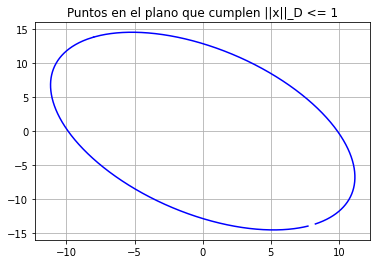

In [196]:
d1=1/16
d2=1/9
f=lambda x: np.sqrt((d1*x[:,0])**2 + (d2*x[:,1])**2) #definición de norma2
density=1e-2
density_p=int(2.5*10**2)
x=np.arange(-1/d1,1/d1,density)
y1=1.0/d2*np.sqrt(1-(d1*x)**2)
y2=-1.0/d2*np.sqrt(1-(d1*x)**2)
x_p=np.random.uniform(-1/d1,1/d1,(density_p,2))
#ind=f(x_p)<=1
#x_p_subset=x_p[ind]
#transform
x_y1_hat = np.column_stack((x,y1))
x_y2_hat = np.column_stack((x,y2))
apply_Q_T = lambda vec : np.transpose(Q.T@np.transpose(vec))
Q_T_to_vector_1 = apply_Q_T(x_y1_hat)
Q_T_to_vector_2 = apply_Q_T(x_y2_hat)
plt.plot(Q_T_to_vector_1[:,0],Q_T_to_vector_1[:,1],'b',
         Q_T_to_vector_2[:,0],Q_T_to_vector_2[:,1],'b')
#plt.plot(x,y1,'b',x,y2,'b')
#plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.title('Puntos en el plano que cumplen ||x||_D <= 1')
plt.grid()
plt.show()

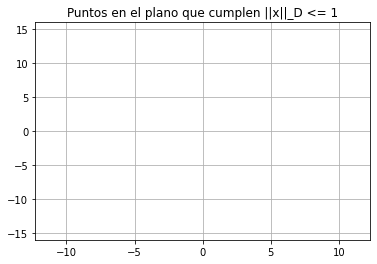

In [199]:
d1=1/16
d2=1/9
f=lambda x: np.sqrt((d1*x[:,0])**2 + (d2*x[:,1])**2) #definición de norma2
density=1e-2
density_p=int(2.5*10**2)
x=np.arange(-1/d1,1/d1,density)
y1=1.0/d2*np.sqrt(1-(d1*x)**2)
y2=-1.0/d2*np.sqrt(1-(d1*x)**2)
x_p=np.random.uniform(-1/d1,1/d1,(density_p,2))
#ind=f(x_p)<=1
#x_p_subset=x_p[ind]
#transform
x_y1_hat = np.row_stack((x,y1))
x_y2_hat = np.row_stack((x,y2))
apply_Q_T = lambda vec : Q.T@vec
Q_T_to_vector_1 = apply_Q_T(x_y1_hat)
Q_T_to_vector_2 = apply_Q_T(x_y2_hat)
plt.plot(Q_T_to_vector_1[0,:],Q_T_to_vector_1[1,:],'b',
         Q_T_to_vector_2[0,:],Q_T_to_vector_2[1,:],'b')
#plt.plot(x,y1,'b',x,y2,'b')
#plt.scatter(x_p_subset[:,0],x_p_subset[:,1],marker='.')
plt.title('Puntos en el plano que cumplen ||x||_D <= 1')
plt.grid()
plt.show()

In [102]:
A = np.array([[0, 1],
              [-2, 3]])

In [103]:
evalue, evector = np.linalg.eig(A)

In [104]:
evalue

array([1., 2.])

In [105]:
evector

array([[-0.70710678, -0.4472136 ],
       [-0.70710678, -0.89442719]])

In [106]:
X_1 = evector
Lambda = np.diag(evalue)

In [107]:
Lambda

array([[1., 0.],
       [0., 2.]])

In [109]:
np.linalg.solve(X_1, A)@X_1

array([[1., 0.],
       [0., 2.]])

In [110]:
X_2 = np.array([[1, 1],
                [1, 2]])

In [111]:
np.linalg.solve(X_2, A)@X_2

array([[1., 0.],
       [0., 2.]])

https://twitter.com/j_bertolotti/status/1192396841381515264

Ver comentario sobre Schur en https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur

In [110]:
from scipy.linalg import schur, eigvals

In [111]:
A = np.array([[0, 2, 2], [0, 1, 2], [1, 0, 1]])

In [112]:
T, Z = schur(A)

In [113]:
T

array([[ 2.65896708,  1.42440458, -1.92933439],
       [ 0.        , -0.32948354, -0.49063704],
       [ 0.        ,  1.31178921, -0.32948354]])

In [115]:
evalue, evector = np.linalg.eig(T)

In [116]:
with np.printoptions(precision=3, suppress=True):
    print(evector)

[[1.   +0.j    0.497-0.081j 0.497+0.081j]
 [0.   +0.j    0.   +0.451j 0.   -0.451j]
 [0.   +0.j    0.737+0.j    0.737-0.j   ]]


In [117]:
print(evalue)

[ 2.65896708+0.j         -0.32948354+0.80225456j -0.32948354-0.80225456j]


In [118]:
A2 = T[1:3, 1:3]

In [119]:
A2

array([[-0.32948354, -0.49063704],
       [ 1.31178921, -0.32948354]])

In [120]:
evalue, evector = np.linalg.eig(A2)

In [121]:
evalue

array([-0.32948354+0.80225456j, -0.32948354-0.80225456j])

## Algunos algoritmos para calcular eigenvalores y eigenvectores

Dependiendo de las siguientes preguntas es el tipo de algoritmo que se utiliza:

* ¿Se requiere el cómputo de todos los eigenvalores o de sólo algunos?

* ¿Se requiere el cómputo de únicamente los eigenvalores o también de los eigenvectores?

* ¿$A$ tiene entradas reales o complejas?

* ¿$A$ es de dimensión pequeña y es densa o grande y rala?

* ¿$A$ tiene una estructura especial o es una matriz general?

Para la última pregunta a continuación se tiene una tabla que resume las estructuras en las matrices que son relevantes para problemas del cálculo de eigenvalores-eigenvectores:

|Estructura|Definición|
|:---:|:---:|
|Simétrica|$A=A^T$|
|Ortogonal|$A^TA=AA^T=I_n$|
|Normal|$A^TA = AA^T$|

```{sidebar} Descomposición espectral para matrices normales

Las matrices normales generalizan al caso de entradas en $\mathbb{C}$ la diagonalización ortogonal al ser **unitariamente diagonalizables**. $A \in \mathbb{C}^{n \times n}$ es normal si y sólo si $A = U \Lambda U^T$ con $U$ matriz unitaria (generalización de una matriz ortogonal a entradas $\mathbb{C}$) y $\Lambda$ matriz diagonal. Para $A \in \mathbb{R}^{n \times n}$ lo anterior se escribe como: $A$ es simétrica si y sólo si es ortogonalmente diagonalizable: $A = Q \Lambda Q^T$ (ver {ref}`descomposición espectral <DESCESP>`).

```

### Ejemplos de matrices normales

$$\begin{array}{l}
\left[
\begin{array}{cc}
1 &-2 \\
2 &1
\end{array}
\right],
\left[
\begin{array}{ccc}
1 &2 & 0\\
0 & 1 & 2\\
2 & 0 & 1
\end{array}
\right]
\end{array}
$$

Otro ejemplo: 

$$A = 
\left[
\begin{array}{ccc}
1 &1 & 0\\
0 & 1 & 1\\
1 & 0 & 1
\end{array}
\right]
$$

In [67]:
A = np.array([[1, 1, 0],
              [0, 1, 1],
              [1, 0, 1.0]])

In [68]:
A.T@A

array([[2., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

In [69]:
A@A.T

array([[2., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

In [70]:
evalue, evector = np.linalg.eig(A)

In [71]:
print('eigenvalores:')
print(evalue)

eigenvalores:
[0.5+0.8660254j 0.5-0.8660254j 2. +0.j       ]


```{margin}

Se verifica que los eigenvectores de este ejemplo forman un conjunto linealmente independiente.

```

In [72]:
with np.printoptions(precision=3, suppress=True):
    print('eigenvectores:')
    print(evector)

eigenvectores:
[[-0.289+0.5j -0.289-0.5j -0.577+0.j ]
 [-0.289-0.5j -0.289+0.5j -0.577+0.j ]
 [ 0.577+0.j   0.577-0.j  -0.577+0.j ]]


```{margin}

Para una matriz normal $A$ se cumple que es unitariamente diagonalizable y $A = Q \Lambda Q^H$ donde: $Q^H$ es la conjugada transpuesta de $Q$.

```

In [73]:
print('descomposición espectral:')
Lambda = np.diag(evalue)
Q = evector


descomposición espectral:


In [74]:
with np.printoptions(precision=3, suppress=True):
    print('QLambdaQ^H:')
    print(Q@Lambda@Q.conjugate().T)


QLambdaQ^H:
[[ 1.+0.j  1.+0.j -0.+0.j]
 [ 0.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j -0.+0.j  1.+0.j]]


In [75]:
A

array([[1., 1., 0.],
       [0., 1., 1.],
       [1., 0., 1.]])

```{margin}

Observa que $Q^HQ=QQ^H = I_3$ donde: $Q^H$ es la conjugada transpuesta de $Q$.
```

In [76]:
with np.printoptions(precision=3, suppress=True):
    print(Q.conjugate().T@Q)

[[1.+0.j 0.-0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.-0.j]
 [0.-0.j 0.+0.j 1.+0.j]]


```{admonition} Observación
:class: tip

El problema del cálculo de eigenvalores para matrices normales es bien condicionado.

```

### Una opción (inestable numéricamente respecto al redondeo): encontrar raíces del polinomio característico... 

Por definición, los eigenvalores de $A \in \mathbb{R}^{n \times n}$ son las raíces o ceros del polinomio característico $p(z)$ por lo que un método es calcularlas vía tal polinomio. Sin embargo, **no es un buen método** calcular tales raíces o ceros pues para una $n > 4$ [Abel](https://en.wikipedia.org/wiki/Abel%E2%80%93Ruffini_theorem) probó de forma teórica que las raíces en general no son posibles expresarlas por una fórmula cerrada que involucren los coeficientes, operaciones aritméticas y raíces $\sqrt[n]{\cdot}$ . Por lo anterior calcular eigenvalores para matrices de dimensión $n>4$ requieren un **método iterativo**.

```{margin}

Como ejemplo de este enunciado considérese:

$$A=\left[
\begin{array}{cc}
1 & \epsilon\\
\epsilon & 1\\
\end{array}
\right]
$$

cuyos eigenvalores son $1 + \epsilon$, $1 - \epsilon$ con $\epsilon$ menor que $\epsilon_{maq}$. Usando aritmética en el SPF se prueba que las raíces del polinomio característico es $1$ de multiplicidad $2$.
```

Además de lo anterior, los coeficientes de polinomios numéricamente no están bien determinados por los errores por redondeo y sus raíces son muy sensibles a perturbaciones de los mismos. 

**Preguntas de comprehensión:**

1.¿Si una matriz es diagonalizable entonces tiene eigenvalores distintos?

2.¿Cuál es el número de condición del problema de cálculo de eigenvalores con multiplicidad simple para una matriz simétrica?

**Referencias:**

1. M. T. Heath, Scientific Computing. An Introductory Survey, McGraw-Hill, 2002.

2.  G. H. Golub, C. F. Van Loan, Matrix Computations, John Hopkins University Press, 2013.

3. L. Trefethen, D. Bau, Numerical linear algebra, SIAM, 1997.

4. C. Meyer, Matrix Analysis and Applied Linear Algebra, SIAM, 2000.